# Projeto ADEL (Análise Dados Estadia em Limeira) - Análise dos Dados dos Bairros
Neste notebook, realizarei alguns tratamentos no dataset de bairros e, posteriormente, a análise dos dados dos bairros de Limeira a fim de determinar os bairros elegíveis.

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Importando os dados

In [2]:
file = files.upload()

Saving bairros.csv to bairros.csv


In [3]:
df = pd.read_csv('bairros.csv')
df.head()

,bairro,latitude,longitude,distancia_unicamp
0,vila rocha,-22.577952,-47.410891,2.243706
1,jardim aquarius,-22.550608,-47.416676,1.467927
2,parque centreville,-22.551580,-47.422222,1.158567
3,parque sao bento,-22.552056,-47.418033,1.258614
4,vila anita,-22.556810,-47.410568,1.508559


In [4]:
columns_rename = {
    'latitude': 'lat',
    'longitude': 'lon',
    'distancia_unicamp': 'dist'
}

df.rename(columns=columns_rename, inplace=True)
df.head()

,bairro,lat,lon,dist
0,vila rocha,-22.577952,-47.410891,2.243706
1,jardim aquarius,-22.550608,-47.416676,1.467927
2,parque centreville,-22.551580,-47.422222,1.158567
3,parque sao bento,-22.552056,-47.418033,1.258614
4,vila anita,-22.556810,-47.410568,1.508559


## Análise exploratória

In [5]:
df.isnull().sum()

bairro    0
lat       0
lon       0
dist      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bairro  59 non-null     object 
 1   lat     59 non-null     float64
 2   lon     59 non-null     float64
 3   dist    59 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [7]:
df.describe()

,lat,lon,dist
count,59.000000,59.000000,59.000000
mean,-22.572316,-47.413645,2.780039
std,0.019447,0.024149,2.344121
min,-22.651307,-47.548925,0.075333
25%,-22.582414,-47.421991,1.376103
50%,-22.569700,-47.410891,2.476853
75%,-22.562740,-47.402588,3.523261
max,-22.511194,-47.352932,13.734928


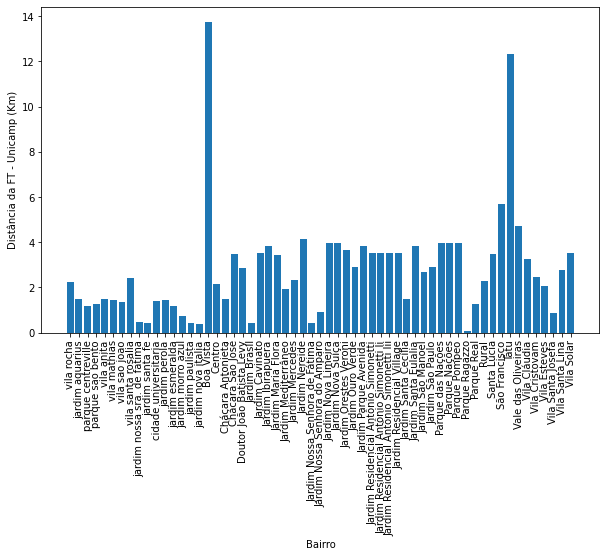

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(df['bairro'], df['dist'])
plt.xlabel('Bairro')
plt.ylabel('Distância da FT - Unicamp (Km)')
plt.xticks(rotation=90)

plt.show()

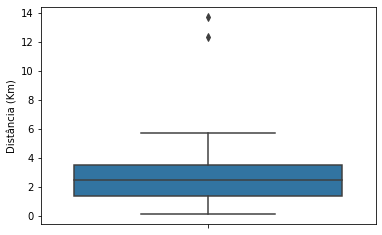

In [9]:
sns.boxplot(y='dist', data=df)
plt.ylabel('Distância (Km)')
plt.show()

In [10]:
df = df[df['dist'] < 8]
df.head()

,bairro,lat,lon,dist
0,vila rocha,-22.577952,-47.410891,2.243706
1,jardim aquarius,-22.550608,-47.416676,1.467927
2,parque centreville,-22.551580,-47.422222,1.158567
3,parque sao bento,-22.552056,-47.418033,1.258614
4,vila anita,-22.556810,-47.410568,1.508559


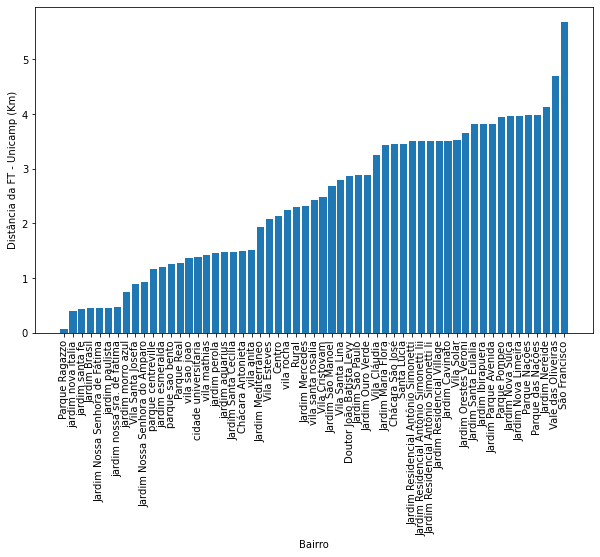

In [11]:
df_sorted = df.sort_values(by='dist')

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['bairro'], df_sorted['dist'])
plt.xlabel('Bairro')
plt.ylabel('Distância da FT - Unicamp (Km)')
plt.xticks(rotation=90)

plt.show()

## Validando os bairros

In [19]:
file = files.upload()

Saving map.png to map (1).png


In [22]:
def gen_fig(df, filename):
  try:
    map_limeira = plt.imread('/content/map.png')
    boundary_box = (-47.5159, -47.2893, -22.6438, -22.5056)

    fig, ax = plt.subplots(figsize=(18, 14))
    plt.figure(dpi=300)
    ax.scatter(df.lon, df.lat, zorder=1, alpha=0.33, c='b', s=20)

    ax.set_title(f'Mapa dos bairros de Limeira - SP')
    ax.set_xlim(boundary_box[0], boundary_box[1])
    ax.set_ylim(boundary_box[2], boundary_box[3])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    ax.imshow(map_limeira, zorder=0, extent=boundary_box, aspect='equal')
    fig.show()
    fig.savefig('map_{}.png'.format(filename), bbox_inches="tight")
    files.download('map_{}.png'.format(filename))
  except:
    print('Imagem do mapa não encontrado!')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

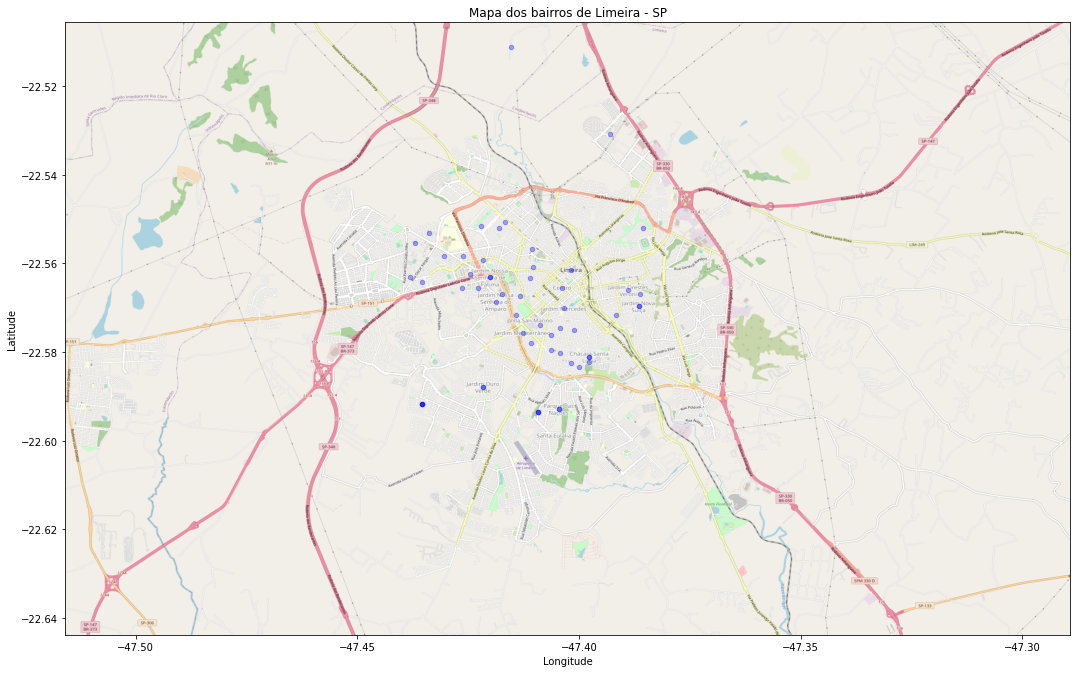

<Figure size 1800x1200 with 0 Axes>

In [23]:
gen_fig(df, 'bairros')

In [54]:
# Gabarito
correct_bairros = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
 11, 12, 13, 14, 15, 16, 17, 21, 23, 24, 25,
 26, 28, 30, 32, 34, 35, 36, 38, 51, 52, 53,
 54, 55, 56]

#correct_bairros = []

for i in range(len(df)):
  bairro = df.iloc[i, 0]
  lat, lon = df.iloc[i, 1:3]
  check = input(f"A localização do bairro '{bairro}' ({lat}, {lon}) está certa? (y/n): ")
  if check == 'y':
    correct_bairros.append(i)

A localização do bairro 'vila rocha' (-22.577951583104486, -47.4108912266049) está certa? (y/n): y
A localização do bairro 'jardim aquarius' (-22.550608190589706, -47.41667575205869) está certa? (y/n): y
A localização do bairro 'parque centreville' (-22.55158046365832, -47.42222150033637) está certa? (y/n): y
A localização do bairro 'parque sao bento' (-22.552056052471706, -47.418032958392956) está certa? (y/n): y
A localização do bairro 'vila anita' (-22.556810220964927, -47.410568487120784) está certa? (y/n): y
A localização do bairro 'vila mathias' (-22.56089938985804, -47.41035742731719) está certa? (y/n): y
A localização do bairro 'vila sao joao' (-22.56340305814457, -47.41099287617915) está certa? (y/n): y
A localização do bairro 'vila santa rosalia' (-22.57623211919229, -47.406309958879994) está certa? (y/n): y
A localização do bairro 'jardim nossa sra. de fatima' (-22.56550370773466, -47.42649966240123) está certa? (y/n): y
A localização do bairro 'jardim santa fe' (-22.5655979

In [ ]:
'''
A localização do bairro 'vila rocha' (-22.577951583104486, -47.4108912266049) está certa? (y/n): y
A localização do bairro 'jardim aquarius' (-22.550608190589706, -47.41667575205869) está certa? (y/n): y
A localização do bairro 'parque centreville' (-22.55158046365832, -47.42222150033637) está certa? (y/n): y
A localização do bairro 'parque sao bento' (-22.552056052471706, -47.418032958392956) está certa? (y/n): y
A localização do bairro 'vila anita' (-22.556810220964927, -47.410568487120784) está certa? (y/n): y
A localização do bairro 'vila mathias' (-22.56089938985804, -47.41035742731719) está certa? (y/n): y
A localização do bairro 'vila sao joao' (-22.56340305814457, -47.41099287617915) está certa? (y/n): y
A localização do bairro 'vila santa rosalia' (-22.57623211919229, -47.406309958879994) está certa? (y/n): y
A localização do bairro 'jardim nossa sra. de fatima' (-22.56550370773466, -47.42649966240123) está certa? (y/n): y
A localização do bairro 'jardim santa fe' (-22.565597998868245, -47.42269729428588) está certa? (y/n): y
A localização do bairro 'cidade universitaria' (-22.553112082481267, -47.4337859195601) está certa? (y/n): y
A localização do bairro 'jardim perola' (-22.563011669111834, -47.43823717661766) está certa? (y/n): y
A localização do bairro 'jardim esmeralda' (-22.564260676816343, -47.43553231131549) está certa? (y/n): y
A localização do bairro 'jardim morro azul' (-22.5584169798876, -47.430454105003) está certa? (y/n): y
A localização do bairro 'jardim paulista' (-22.558299143228318, -47.42619275210369) está certa? (y/n): y
A localização do bairro 'jardim nova italia' (-22.559177655613762, -47.421761267052034) está certa? (y/n): y
A localização do bairro 'Centro' (-22.565492000000003, -47.4037983) está certa? (y/n): y
A localização do bairro 'Chácara Antonieta' (-22.555338300000006, -47.436975310795454) está certa? (y/n): y
A localização do bairro 'Chácara São José' (-22.581139899999997, -47.3976727) está certa? (y/n): n
A localização do bairro 'Doutor João Batista Levy' (-22.580150600000003, -47.4043556) está certa? (y/n): n
A localização do bairro 'Jardim Brasil' (-22.5631324, -47.4200484) está certa? (y/n): n
A localização do bairro 'Jardim Cavinato' (-22.571592300000002, -47.391631700000005) está certa? (y/n): y
A localização do bairro 'Jardim Ibirapuera' (-22.5935275, -47.4092206) está certa? (y/n): n
A localização do bairro 'Jardim Maria Flora' (-22.5833573, -47.4001156) está certa? (y/n): y
A localização do bairro 'Jardim Mediterrâneo' (-22.5756418, -47.4127145) está certa? (y/n): y
A localização do bairro 'Jardim Mercedes' (-22.5701692, -47.4034094) está certa? (y/n): y
A localização do bairro 'Jardim Nereide' (-22.552035699999998, -47.3854935) está certa? (y/n): y
A localização do bairro 'Jardim Nossa Senhora de Fátima' (-22.5631324, -47.4200484) está certa? (y/n): n
A localização do bairro 'Jardim Nossa Senhora do Amparo' (-22.5686177, -47.4187495) está certa? (y/n): y
A localização do bairro 'Jardim Nova Limeira' (-22.569700100000002, -47.386562299999994) está certa? (y/n): n
A localização do bairro 'Jardim Nova Suíça' (-22.569700100000002, -47.386562299999994) está certa? (y/n): y
A localização do bairro 'Jardim Orestes Veroni' (-22.566096899999998, -47.3888908) está certa? (y/n): n
A localização do bairro 'Jardim Ouro Verde' (-22.5878737, -47.4216327) está certa? (y/n): y
A localização do bairro 'Jardim Parque Avenida' (-22.5935275, -47.4092206) está certa? (y/n): n
A localização do bairro 'Jardim Residencial Antônio Simonetti' (-22.5917801, -47.435354600000004) está certa? (y/n): y
A localização do bairro 'Jardim Residencial Antônio Simonetti Ii' (-22.5917801, -47.435354600000004) está certa? (y/n): y
A localização do bairro 'Jardim Residencial Antônio Simonetti Iii' (-22.5917801, -47.435354600000004) está certa? (y/n): y
A localização do bairro 'Jardim Residencial Village' (-22.5917801, -47.435354600000004) está certa? (y/n): n
A localização do bairro 'Jardim Santa Cecília' (-22.5715651, -47.4142541) está certa? (y/n): y
A localização do bairro 'Jardim Santa Eulalia' (-22.5935275, -47.4092206) está certa? (y/n): n
A localização do bairro 'Jardim São Manoel' (-22.579555300000003, -47.406221) está certa? (y/n): n
A localização do bairro 'Jardim São Paulo' (-22.5878737, -47.4216327) está certa? (y/n): n
A localização do bairro 'Parque das Nações' (-22.592908899999998, -47.404583200000005) está certa? (y/n): n
A localização do bairro 'Parque Nações' (-22.592908899999998, -47.404583200000005) está certa? (y/n): n
A localização do bairro 'Parque Pompeo' (-22.5668154, -47.38616103288386) está certa? (y/n): n
A localização do bairro 'Parque Ragazzo' (-22.5624682, -47.42455469660756) está certa? (y/n): n
A localização do bairro 'Parque Real' (-22.5672753, -47.413293599999996) está certa? (y/n): n
A localização do bairro 'Rural' (-22.5615068, -47.401765999999995) está certa? (y/n): n
A localização do bairro 'Santa Lúcia' (-22.581139899999997, -47.3976727) está certa? (y/n): n
A localização do bairro 'São Francisco' (-22.5111943, -47.4153914) está certa? (y/n): n
A localização do bairro 'Vale das Oliveiras' (-22.5308272, -47.3929438) está certa? (y/n): n
A localização do bairro 'Vila Cláudia' (-22.5824871, -47.4017282) está certa? (y/n): y
A localização do bairro 'Vila Cristovam' (-22.5745619, -47.404340600000005) está certa? (y/n): y
A localização do bairro 'Vila Esteves' (-22.5739428, -47.4087716) está certa? (y/n): y
A localização do bairro 'Vila Santa Josefa' (-22.5668295, -47.41737620000001) está certa? (y/n): y
A localização do bairro 'Vila Santa Lina' (-22.575127600000002, -47.401097299999996) está certa? (y/n): y
A localização do bairro 'Vila Solar' (-22.5823419, -47.3978518) está certa? (y/n): y
'''

In [59]:
df = df.iloc[correct_bairros].reset_index(drop=True)
df.head()

,bairro,lat,lon,dist
0,vila rocha,-22.577952,-47.410891,2.243706
1,jardim aquarius,-22.550608,-47.416676,1.467927
2,parque centreville,-22.551580,-47.422222,1.158567
3,parque sao bento,-22.552056,-47.418033,1.258614
4,vila anita,-22.556810,-47.410568,1.508559


In [60]:
df.shape

(36, 4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

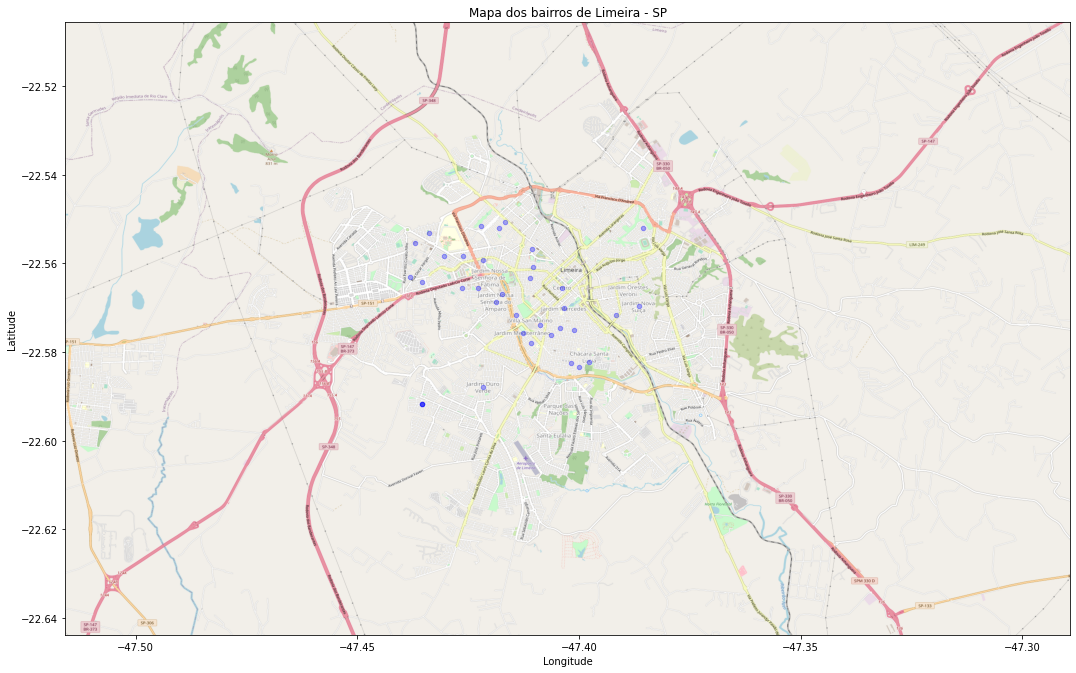

<Figure size 1800x1200 with 0 Axes>

In [61]:
gen_fig(df, 'bairros_valid')

## Selecionar bairros elegíveis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


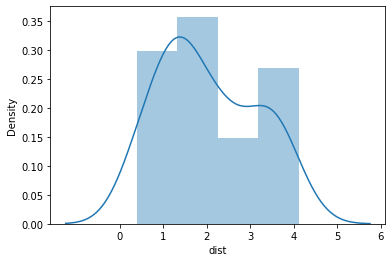

In [69]:
sns.distplot(a=df['dist'])
plt.xticks(range(7))
plt.show()

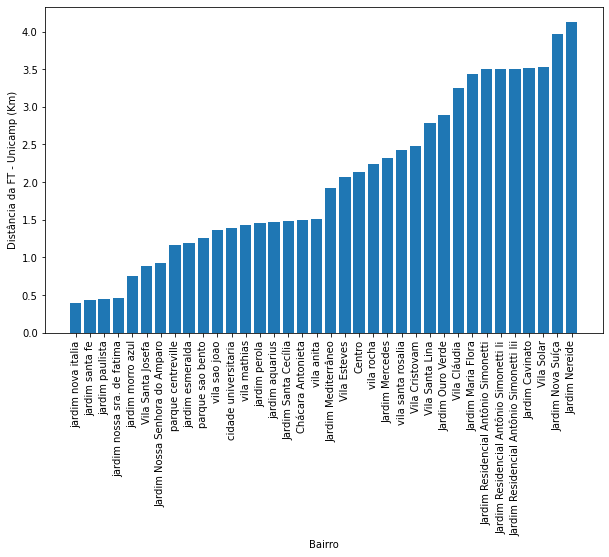

In [62]:
df_sorted = df.sort_values(by='dist')

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['bairro'], df_sorted['dist'])
plt.xlabel('Bairro')
plt.ylabel('Distância da FT - Unicamp (Km)')
plt.xticks(rotation=90)

plt.show()

In [75]:
print(f'{df_sorted.shape[0]} bairros elegíveis.')

36 bairros elegíveis.


In [77]:
print(f'{df[df.dist < 1.5].shape[0]} bairros eleitos com distância menor que 1.5Km.')

16 bairros eleitos com distância menor que 1.5Km.


In [74]:
df[df.dist < 1.5]

,bairro,lat,lon,dist
1,jardim aquarius,-22.550608,-47.416676,1.467927
2,parque centreville,-22.551580,-47.422222,1.158567
3,parque sao bento,-22.552056,-47.418033,1.258614
5,vila mathias,-22.560899,-47.410357,1.425913
6,vila sao joao,-22.563403,-47.410993,1.366778
8,jardim nossa sra. de fatima,-22.565504,-47.426500,0.466497
9,jardim santa fe,-22.565598,-47.422697,0.438750
10,cidade universitaria,-22.553112,-47.433786,1.385428
11,jardim perola,-22.563012,-47.438237,1.451089
12,jardim esmeralda,-22.564261,-47.435532,1.196814


In [86]:
df_distantes = df.query('dist >= 1.5 and dist < 3.5').reset_index(drop=True)
df_distantes.head()

,bairro,lat,lon,dist
0,vila rocha,-22.577952,-47.410891,2.243706
1,vila anita,-22.556810,-47.410568,1.508559
2,vila santa rosalia,-22.576232,-47.406310,2.429568
3,Centro,-22.565492,-47.403798,2.134072
4,Chácara Antonieta,-22.555338,-47.436975,1.502339


In [87]:
df_distantes.shape

(13, 4)

In [88]:
# Exportar os bairros muito distantes da faculdade
# para ver se passa alguma linha de ônibus que
# leve até ela.
df_distantes.to_csv(r'bairros_distantes.csv', index=False)
files.download('bairros_distantes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>